### Stochastic Process

이번 주차에서는 금융 모델링에 쓰이는 확률 과정을 알아보도록 한다

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from stochastic_process import MonteCarloSimulation

simulation = MonteCarloSimulation(
    interest_rate = 0.05,    
    initial_price = 100,     
    maturity = 0.5,          
    sigma = 0.2,           
    dividend_yield = 0.02,  
    nObs = 1000,           
    slices = 504,       
    random_state = 42 
)

#### Geometric Brownian motion

기하 브라운 운동(Geometric Brownian Motion)은 다음과 같이 나타낼 수 있다

$$dS_t = \mu S_tdt + \sigma S_tdW_t$$

- $dS_t$는 시간 $t$에서의 자산 가격 변화량이다
- $S_t$는 시간 $t$에서의 자산 가격이다
- $\mu$는 자산의 기대 수익률(또는 drift)을 나타낸다
- $\sigma$는 자산 가격의 변동성(또는 확산)을 나타낸다
- $dt$는 시간의 변화량을 나타낸다
- $dW_t$는 위너 프로세스(Wiener process)의 증분으로, 표준 브라운 운동을 나타낸다.

GBM은 로그 정규 분포를 가정하기 때문에, 자산 가격이 음수가 될 수 없으며, 시간이 지남에 따라 자산 가격의 로그가 정규 분포를 따른다. 이 모델은 Black-Scholes model과 같은 금융 파생 상품의 가격 결정에 중요한 역할을 한다.

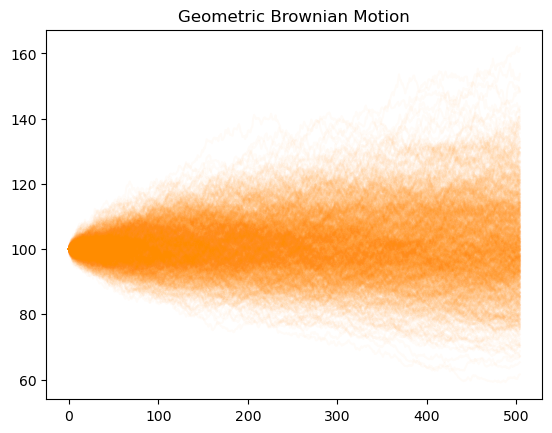

In [8]:
gbm_paths = simulation.geometric_brownian_motion()
plt.plot(gbm_paths.T, color = 'darkorange', alpha = 0.03)
plt.title('Geometric Brownian Motion')
plt.show()

#### Ornstein Uhlenbeck Process

Ornstein-Uhlenbeck 과정의 수식은 다음과 같이 나타낼 수 있다

$$dX_t = \theta (\mu - X_t) dt + \sigma dW_t$$

여기서,

- $dX_t$는 시간 $t$에서의 과정의 변화량이다.
- $X_t$는 시간 $t$에서의 과정의 값이다.
- $\theta$는 속도를 결정하는 상수이며, 이는 과정이 장기 평균 $\mu$로 돌아가는 속도를 나타낸다.
- $\mu$는 과정의 장기 평균(또는 평균 회귀 수준)이다.
- $\sigma$는 과정의 변동성을 나타낸다.
- $dW_t$는 시간 $t$에서의 표준 브라운 운동의 증분이다.

Ornstein-Uhlenbeck 과정은 평균 회귀 특성을 가진 확률 과정으로, 시간이 지남에 따라 특정 평균 값으로 회귀하려는 성질을 가지고 있다. 이 과정은 금융에서 이자율 모델링, 상품 가격, 그리고 다른 많은 영역에서 사용된다. 과정의 핵심은 어떤 변수가 장기 평균에서 멀어질수록, 다시 그 평균으로 돌아가려는 경향이 있다는 것이다. 이러한 특성 때문에, Ornstein-Uhlenbeck 과정은 **평균 회귀를 모델링**하는 데 유용하다.

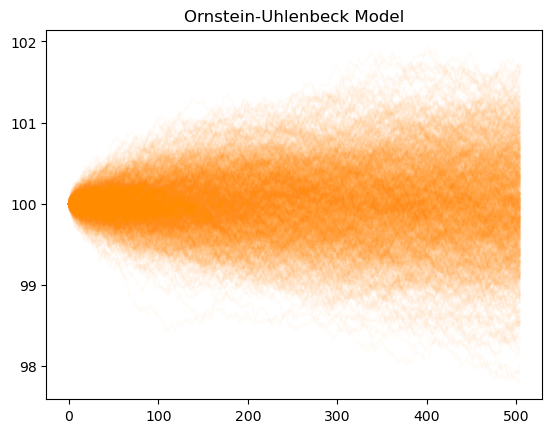

In [12]:
ou_paths = simulation.ornstein_uhlenbeck(
    kappa = 0.1, # 수렴 속도
    theta = 100, # 장기 평균선
    sigma = 1
)
plt.plot(ou_paths.T, color = 'darkorange', alpha = 0.03)
plt.title('Ornstein-Uhlenbeck Model')
plt.show()

#### Vasicek Model

Vasicek 모델의 수식은 다음과 같이 나타낼 수 있다.

$$dr_t = \kappa (\theta - r_t)  dt + \sigma dW_t$$

여기서,

- $dr_t$는 시간 $t$에서의 이자율의 미소 변화량이다.
- $r_t$는 시간 $t$에서의 순간적인 이자율이다.
- $\kappa$는 이자율이 장기 평균 $\theta$로 회귀하는 속도를 나타내는데, 이를 평균 회귀 속도라고 한다.
- $\theta$는 장기 평균 이자율이다.
- $\sigma$는 이자율의 변동성을 나타낸다.
- $dW_t$는 시간 $t$에서의 Wienner 프로세스의 증분으로, 무작위 변동을 나타낸다.

Vasicek 모델은 이자율의 미래 경로를 모델링하는 데 사용되며, 평균 회귀 특성을 가지고 있다. 이 모델에 따르면, 이자율은 시간이 지남에 따라 평균 이자율 $\theta$로 회귀하려는 경향이 있으며, $\kappa $값은 이 회귀하는 속도를 결정한다. 또한, $\sigma$는 이자율 변동의 불확실성을 나타내며, $dW_t$는 이자율의 변동을 무작위적으로 만드는 요소다.

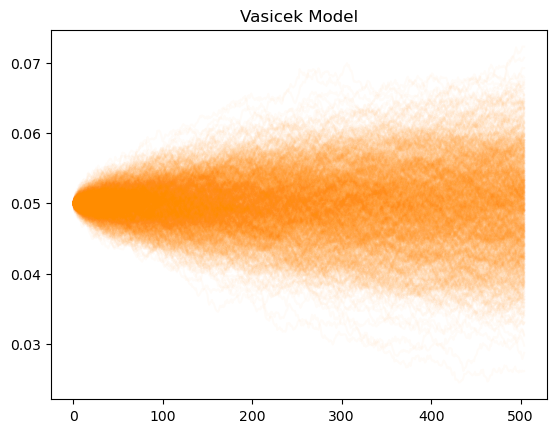

In [14]:
vasicek_paths = simulation.vasicek_model(
    kappa = 0.1, # 수렴속도 
    theta = 0.05, # 장기 회귀평균
    sigma_r = 0.01 # 이자율 변동성
)
plt.plot(vasicek_paths.T, color = 'darkorange', alpha = 0.03)
plt.title('Vasicek Model')
plt.show()

#### Cox Ingersoll Ross Model

Cox-Ingersoll-Ross(CIR) 모델의 수식은 다음과 같이 나타낼 수 있다.

$$dr_t = \kappa (\theta - r_t) dt + \sigma \sqrt{r_t} dW_t$$

여기서,

- $dr_t$는 시간 $t$에서의 이자율의 미소 변화량이다.
- $r_t$는 시간 $t$에서의 순간적인 이자율이다.
- $\kappa$는 이자율이 장기 평균 $\theta$로 회귀하는 속도를 나타내며, 평균 회귀 속도라고 한다.
- $\theta$는 장기 평균 이자율이다.
- $\sigma$는 이자율의 변동성을 나타낸다.
- $\sqrt{r_t}$는 이자율 $r_t$의 제곱근으로, 변동성 항에 이자율의 수준에 따른 변동성 조정을 반영한다.
- $dW_t$는 시간 $t$에서의 Wienner 프로세스의 증분으로, 무작위 변동을 나타낸다.

CIR 모델은 이자율 모델 중 하나로, 이자율의 미래 변화를 설명하기 위해 사용된다. CIR 모델은 평균 회귀 특성을 가지고 있어 이자율이 장기 평균으로 돌아가려는 경향을 모델링한다. 특히, 이자율의 변동성이 이자율의 수준에 따라 달라진다는 점이 특징이다. 즉, 이자율이 낮을 때는 변동성이 작고, 이자율이 높을 때는 변동성이 커지도록 모델링한다.

CIR 모델의 중요한 특성 중 하나는 이자율이 음수가 되지 않는다는 것이다. 이는 $\sqrt r_t$ 항 때문에, 이자율 $r_t$가 0에 가까워지면 변동성도 0에 가까워지므로, 이자율이 음수로 떨어질 가능성을 제한한다. 이러한 특성 때문에, CIR 모델은 금융에서 이자율의 미래 경로를 모델링하고 채권 가격이나 이자율 파생 상품을 평가하는 데 널리 사용된다.

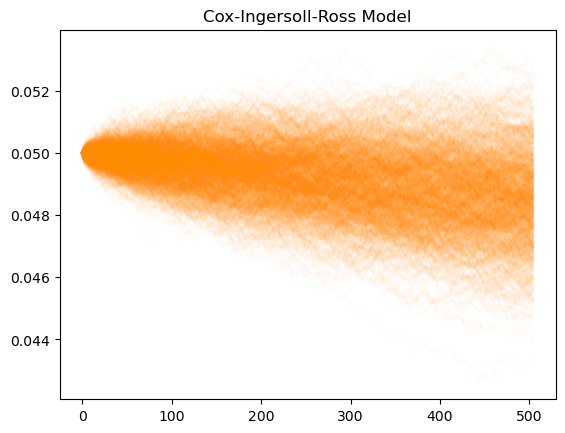

In [6]:
cir_paths = simulation.cox_ingersoll_ross_model(
    kappa = 0.15, # 수렴속도 
    theta = 0.03, # 장기평균
    sigma_r = 0.01 # 이자율의 변동성
)
plt.plot(cir_paths.T, color = 'darkorange', alpha = 0.03)
plt.title('Cox-Ingersoll-Ross Model')
plt.show()

#### Heston Model

Heston 모델은 옵션 가격 결정에 사용되는 확률 변동성 모델 중 하나이며, 자산 가격의 변동성이 시간에 따라 변화한다는 점을 고려한다. Heston 모델의 기본 수식은 다음과 같이 두 가지 확률 과정으로 구성된다.

자산 가격 S에 대한 과정:


$$dS_t = \mu S_t dt + \sqrt{v_t} S_t dW_t^S$$
변동성 v에 대한 과정:


$$dv_t = \kappa (\theta - v_t) dt + \sigma \sqrt{v_t} dW_t^v$$
여기서,

- $dS_t$는 시간 $t$에서의 자산 가격의 변화량이다.
- $S_t$는 시간 $t$에서의 자산 가격이다.
- $\mu$는 자산의 기대 수익률이다.
- $\sqrt{v_t}$는 시간 $t$에서의 자산 가격 변동성의 제곱근이다, 이는 변동성이 확률 과정을 따른다는 Heston 모델의 핵심이다.
- $dW_t^S$와 $dW_t^v$는 두 개의 Wienner Process로, 자산 가격과 변동성의 변화를 구동한다. 이 두 프로세스는 일반적으로 상관 관계를 가진다.
- $dv_t$는 시간 $t$에서의 변동성의 변화량이다.
- $\kappa$는 변동성이 장기 평균 $\theta$로 회귀하는 속도이다.
- $\theta$는 변동성의 장기 평균이다.
- $\sigma$는 변동성의 변동성, 즉 변동성의 불확실성을 나타낸다.

Heston 모델은 변동성이 상수가 아니라 시간에 따라 변하고, 특정 평균 값으로 회귀하는 경향이 있음을 고려한다. 이러한 변동성의 동적 특성은 옵션 가격 결정에 중요한 요소이며, Heston 모델을 사용하면 실제 시장의 volatility smile 현상을 더 잘 포착할 수 있다.

Heston 모델은 수학적으로 복잡하며, 옵션 가격을 계산하기 위해서는 수치적 방법이나 closed-form solution를 사용해야 한다. 이 모델은 금융 공학에서 널리 사용되며, 시장의 변동성을 더 정밀하게 모델링할 수 있는 유연성 때문에 많은 연구와 응용이 이루어지고 있다.

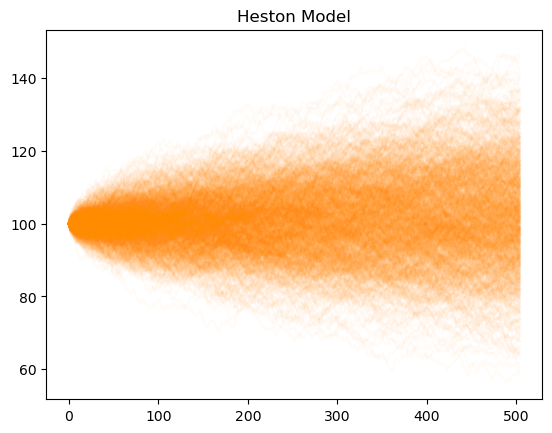

In [7]:
heston_paths = simulation.heston_model(
    kappa = 0.1, 
    theta = 0.04, 
    sigma_v = 0.1, 
    rho = -0.7
)
plt.plot(heston_paths.T, color = 'darkorange', alpha = 0.03)
plt.title('Heston Model')
plt.show()

#### Jump Diffusion Model

Jump diffusion 모델은 자산 가격의 변동성을 설명할 때 연속적인 변동뿐만 아니라 갑작스러운 변동(점프)을 모델링하는 방식이다. 이 모델은 자산 가격의 변화를 일반적인 확률적 변동과 점프 두 가지 요소로 구성된다고 보며, Merton(1976)에 의해 소개되었다. Jump diffusion 모델의 기본 수식은 다음과 같다.

$$dS_t = \mu S_t dt + \sigma S_t dW_t + S_t dJ_t$$
여기서,

- $dS_t$는 시간 $t$에서의 자산 가격의 변화량이다.
- $S_t$는 시간 $t$에서의 자산 가격이다.
- $\mu$는 자산의 기대 수익률이다.
- $\sigma$는 자산 가격의 연속적인 변동성을 나타낸다.
- $dW_t$는 Wienner Process의 증분으로, 연속적인 변동을 모델링한다.
- $dJ_t$는 점프 프로세스의 증분으로, 갑작스러운 가격 변동(점프)을 나타낸다.

Jump diffusion 모델에서는 자산 가격의 변동이 두 가지로 구분된다:

- 연속적인 변동(확산 과정): 이는 기존의 확률 과정(예: Geometric Brownian Motion)으로 모델링되며, 시간에 따른 자연스러운 가격의 변화를 설명한다.
- 점프(불연속적인 변동): 특정 이벤트(예: 경제 뉴스, 회사의 급작스런 변화)로 인해 자산 가격에 갑작스럽게 큰 변동이 발생하는 경우를 모델링한다. 점프의 크기와 발생 빈도는 별도의 확률 과정으로 모델링된다.


Jump diffusion 모델은 금융 시장에서 자산 가격이 갑작스러운 큰 변동을 경험할 수 있다는 현실을 반영하기 때문에, 옵션 가격 결정이나 위험 관리 등에서 중요하게 활용된다.

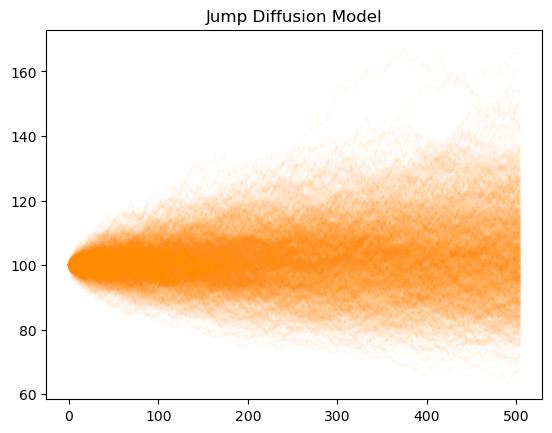

In [15]:
jd_paths = simulation.jump_diffusion_model(
    jump_intensity = 0.2, 
    jump_mean = -0.05, 
    jump_std = 0.1
)
plt.plot(jd_paths.T, color = 'darkorange', alpha = 0.03)
plt.title('Jump Diffusion Model')
plt.show()